In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from src.ml_statistical_features import load_data_as_dataframe

In [2]:
def print_informative_stats(data):
    print("Informativ nach informative_ce: ", str(len(data[data['informative_ce']])))
    print("Nicht informativ nach informative_ce: ", str(len(data) - len(data[data['informative_ce']])))

    print("Informativ nach informative_hr: ", str(len(data[data['informative_hr']])))
    print("Nicht informativ nach informative_hr: ", str(len(data) - len(data[data['informative_hr']])))

    both_informative = [hr and ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
    print("Informativ nach beiden: ", str(len(data[both_informative])))

    only_hr_informative = [hr and not ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
    print("Informativ nur nach informative_hr: ", str(len(data[only_hr_informative])))

In [3]:
def print_hr_stats(data):
    print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())
    
    inf_data = data[data['informative_hr']]
    print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: ", inf_data['bcg_hr'].median())
    print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: ", inf_data['ecg_hr'].median())

    print("Durchschnittliche Herzrate nach EKG: ", data['ecg_hr'].median())

In [4]:
data = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=10)

In [5]:
data.head()

,minimum,maximum,mean,standard deviation,range,iqr,mad,number zero crossings,kurtosis,skewness,variance local maxima,variance local minima,mean signal envelope,informative_ce,informative_hr,ecg_hr,bcg_hr,mean error,coverage,patient_id
0,-57.283855,54.798199,-0.002691,17.838348,112.082054,22.141158,16.073205,132,0.258494,-0.320806,138.934982,273.457215,17.695377,True,False,48.0,61.908856,0.012293,103.0,27
1,-441.300589,418.670653,-0.012013,109.566497,859.971242,51.047688,37.726909,129,3.233755,0.000127,11867.050857,12542.079298,103.344882,False,False,60.0,71.760797,0.011074,30.3,27
2,-65.537668,43.288128,-0.038144,18.967748,108.825796,23.489284,17.313389,132,0.294830,-0.569472,110.976304,357.828455,18.837632,True,False,54.0,65.870197,0.007268,99.6,27
3,-69.041959,43.523798,-0.006634,19.315408,112.565757,24.964586,18.387381,134,0.298317,-0.472247,149.233774,372.308987,19.164627,True,True,54.0,55.598456,0.010061,102.5,27
4,-66.113475,47.172144,0.005047,17.933684,113.285619,21.247083,15.763501,132,0.436666,-0.401264,152.470545,292.774768,17.802031,True,True,54.0,58.355438,0.012115,102.4,27


In [6]:
print_informative_stats(data)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  16692
Nicht informativ nach informative_hr:  71718
Informativ nach beiden:  5405
Informativ nur nach informative_hr:  11287


In [7]:
print_hr_stats(data)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.16417910447761
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  66.0
Durchschnittliche Herzrate nach EKG:  54.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea1334be0>,
      dtype=object)

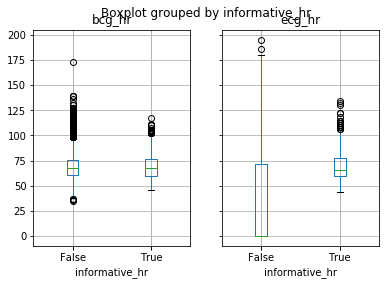

In [8]:
data.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')

In [9]:
data2 = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=15)

In [10]:
data2.head()

,minimum,maximum,mean,standard deviation,range,iqr,mad,number zero crossings,kurtosis,skewness,variance local maxima,variance local minima,mean signal envelope,informative_ce,informative_hr,ecg_hr,bcg_hr,mean error,coverage,patient_id
0,-57.283855,54.798199,-0.002691,17.838348,112.082054,22.141158,16.073205,132,0.258494,-0.320806,138.934982,273.457215,17.695377,True,False,48.0,61.908856,0.012293,103.0,27
1,-441.300589,418.670653,-0.012013,109.566497,859.971242,51.047688,37.726909,129,3.233755,0.000127,11867.050857,12542.079298,103.344882,False,False,60.0,71.760797,0.011074,30.3,27
2,-65.537668,43.288128,-0.038144,18.967748,108.825796,23.489284,17.313389,132,0.294830,-0.569472,110.976304,357.828455,18.837632,True,False,54.0,65.870197,0.007268,99.6,27
3,-69.041959,43.523798,-0.006634,19.315408,112.565757,24.964586,18.387381,134,0.298317,-0.472247,149.233774,372.308987,19.164627,True,True,54.0,55.598456,0.010061,102.5,27
4,-66.113475,47.172144,0.005047,17.933684,113.285619,21.247083,15.763501,132,0.436666,-0.401264,152.470545,292.774768,17.802031,True,True,54.0,58.355438,0.012115,102.4,27


In [11]:
print_informative_stats(data2)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  22894
Nicht informativ nach informative_hr:  65516
Informativ nach beiden:  6492
Informativ nur nach informative_hr:  16402


In [12]:
print_hr_stats(data2)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.81985352142316
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  66.0
Durchschnittliche Herzrate nach EKG:  54.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea6095d68>,
      dtype=object)

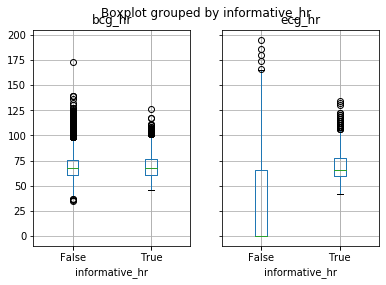

In [13]:
data2.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')

In [15]:
data3 = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=20)
data.head()

,minimum,maximum,mean,standard deviation,range,iqr,mad,number zero crossings,kurtosis,skewness,variance local maxima,variance local minima,mean signal envelope,informative_ce,informative_hr,ecg_hr,bcg_hr,mean error,coverage,patient_id
0,-57.283855,54.798199,-0.002691,17.838348,112.082054,22.141158,16.073205,132,0.258494,-0.320806,138.934982,273.457215,17.695377,True,False,48.0,61.908856,0.012293,103.0,27
1,-441.300589,418.670653,-0.012013,109.566497,859.971242,51.047688,37.726909,129,3.233755,0.000127,11867.050857,12542.079298,103.344882,False,False,60.0,71.760797,0.011074,30.3,27
2,-65.537668,43.288128,-0.038144,18.967748,108.825796,23.489284,17.313389,132,0.294830,-0.569472,110.976304,357.828455,18.837632,True,False,54.0,65.870197,0.007268,99.6,27
3,-69.041959,43.523798,-0.006634,19.315408,112.565757,24.964586,18.387381,134,0.298317,-0.472247,149.233774,372.308987,19.164627,True,True,54.0,55.598456,0.010061,102.5,27
4,-66.113475,47.172144,0.005047,17.933684,113.285619,21.247083,15.763501,132,0.436666,-0.401264,152.470545,292.774768,17.802031,True,True,54.0,58.355438,0.012115,102.4,27


In [16]:
print_informative_stats(data3)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  28674
Nicht informativ nach informative_hr:  59736
Informativ nach beiden:  7293
Informativ nur nach informative_hr:  21381


In [17]:
print_hr_stats(data3)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  68.48279398264005
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  69.0
Durchschnittliche Herzrate nach EKG:  54.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea60ed860>,
      dtype=object)

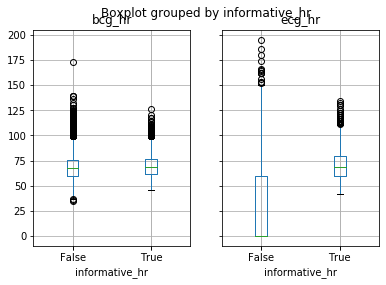

In [18]:
data3.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')